# Curso de Capacitación en Python para Data Science - Sesión 3

<img src='https://www.danielsaromo.xyz/assets/img/logo-pucp.png' width=200px>


BSc. Stev Huamán (mhuamanr@pucp.edu.pe)

<font color='#33FFEE'> Desafío 2: Visualizacion de datos usando matplotlib y seaborn en data tabular y geoespacial.</font>

Completar con su código los campos requeridos y subir su notebook solucionado a la plataforma PAIDEIA. El formato del nombre del notebook es: `Desafio2_APELLIDOPATERNO_NOMBRE.ipynb`.

Es responsabilidad del alumno verificar que el archivo que subió es el correcto. Respetar los lineamientos de la entrega de archivo, ya que influirá en su calificación. La fecha límite de entrega del presente desafío se encuentra en PAIDEIA. No se aceptarán entregas luego de haberse publicado el solucionario de la tarea.

# Uber Dataset Perú

Este conjunto de datos proviene de una startup de movilidad que permite a cualquier usuario reservar un viaje desde cualquier punto A hasta cualquier punto B dentro de la ciudad utilizando un teléfono inteligente. El valor del viaje se calcula automáticamente en el momento de la solicitud mediante la aplicación, teniendo en cuenta la distancia, el tiempo de viaje estimado y la disponibilidad actual de vehículos (equilibrio entre la demanda y la oferta).

Una vez que el viaje termina, cargamos la tarjeta de crédito del pasajero y transferimos X% de este valor a la cuenta bancaria del conductor. Finalmente, antes de que el pasajero sea recogido, el viaje puede ser cancelado tanto por el conductor como por el pasajero.

Un análisis descriptivo de los datos podría incluir:

- ¿Cuántos? (por ejemplo, vehículos, pasajeros, conductores).
- ¿Cuándo? (por ejemplo, viajes/precio/costo por período de tiempo, ¿son los viajes rápidos?).
- ¿Qué? (por ejemplo, reservas/inmediatas, tipo de vehículo).
- ¿Quiénes? (por ejemplo, peores pasajeros, mejores conductores).
- Cualquier pregunta que consideres interesante.

## Análisis Inicial del Dataset

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
#data = pd.read_csv('uber_peru_2010.csv', sep=';')
data = pd.read_csv('https://raw.githubusercontent.com/CristhianCastro25/Programacion_Analisis_Exploratorio/main/uber_peru_2010.csv', sep=';')

1. Indicar el tamaño del dataframe, cantidad de filas y de columnas ( 1 punto)

In [ ]:
data.shape

(23111, 28)

Visualizamos los primeros 5 elementos del dataframe

Para poder visualizar todas las columnas:

In [ ]:
pd.set_option('display.max_columns', None)
data.head(5)

,journey_id,user_id,driver_id,taxi_id,icon,start_type,start_at,start_lat,start_lon,end_at,end_lat,end_lon,end_state,driver_start_lat,driver_start_lon,arrived_at,currency,price,price_distance,price_duration,distance,duration,cost,cost_distance,cost_duration,source,driver_score,rider_score
0,23a1406fc6a11d866e3c82f22eed4d4c,0e9af5bbf1edfe591b54ecdfd7e91e26,583949a89a9ee17d19e3ca4f137b6b4c,b12f4f09c783e29fe0d0ea624530db56,executive,asap,16/11/2010 16:44,"-12,13983536","-77,02355957",16/11/2010 17:29,"-12,05537033","-77,0413208",drop off,"-12,10825481","-77,0272739",16/11/2010 17:02,PEN,3821.0,3626.0,195.0,11331.0,234.0,0.0,0.0,0.0,iPhone,5.0,5.0
1,dd2af4715d0dc16eded53afc0e243577,a553c46e3a22fb9c326aeb3d72b3334e,NaN,NaN,executive,asap,01/06/2010 0:34,"-12,13874817","-76,99536133",01/06/2010 0:37,"-12,12465668","-77,02886963",not found,NaN,NaN,NaN,PEN,0.0,NaN,NaN,0.0,0.0,0.0,NaN,NaN,iPhone,NaN,NaN
2,dd91e131888064bf7df3ce08f3d4b4ad,a553c46e3a22fb9c326aeb3d72b3334e,NaN,NaN,executive,asap,31/05/2010 5:01,"-12,12453079","-77,02780151",31/05/2010 5:04,"-12,13883209","-76,99530029",not found,NaN,NaN,NaN,PEN,0.0,NaN,NaN,0.0,0.0,0.0,NaN,NaN,iPhone,NaN,NaN
3,dd2af4715d0dc16eded53afc0e2466d0,a553c46e3a22fb9c326aeb3d72b3334e,NaN,NaN,executive,asap,01/06/2010 0:29,"-12,13885117","-76,99530029",01/06/2010 0:32,"-12,12458801","-77,02896118",not found,NaN,NaN,NaN,PEN,0.0,NaN,NaN,0.0,0.0,0.0,NaN,NaN,iPhone,NaN,NaN
4,85b7eabcf5d84e42dc7629b7d27781af,56772d544fdfa589a020a1ff894a86f7,d665fb9f75ef5d9cd0fd89479380ba78,0accdd3aa5a322f4129fa20b53278c69,executive,reserved,11/09/2010 23:55,"-12,08995438","-76,92626953",12/09/2010 1:07,"-12,02223206","-77,10638428",drop off,"-12,08311558","-76,9277072",11/09/2010 23:50,PEN,8227.0,7665.0,562.0,30270.0,715.0,6173.0,5756.0,417.0,iPhone,4.0,5.0


2. Indica la cantidad y proporción de valores nulos por cada columna.  ( 2 puntos)
 - ¿Qué conclusiones o qué tratamiento le podemos dar a los datos faltantes?
 - Los datos faltan por error de lectura o por alguna otra razón?

Para los datos faltantes se podrian elimirar los registros si los datos fueran pocos y
no se perdiera mucha data, también se podrian imputar los valores por ceros, por la media,
mediana o moda, asi también se puden predecir por algun modelo de regresion lineal, segun sea el caso.

In [ ]:
data.isna().sum()

journey_id              0
user_id                 0
driver_id            3385
taxi_id              3385
icon                    0
start_type              0
start_at                0
start_lat               0
start_lon               0
end_at                276
end_lat                 0
end_lon                 0
end_state              12
driver_start_lat     3490
driver_start_lon     3490
arrived_at           5395
currency                0
price                 398
price_distance       3170
price_duration       3170
distance              263
duration              263
cost                 1351
cost_distance        5073
cost_duration        5073
source                123
driver_score        15461
rider_score          7721
dtype: int64

In [ ]:
# Journey_id corresponde a un id único de cada viaje. Entonces la cantidad única de journey_id corresponde al total de filas del dataset.
data['journey_id'].nunique()

23111

In [ ]:
# Existen 1390 usuarios distintos
data['user_id'].nunique()

1390

In [ ]:
# Y 168 drivers
data['driver_id'].nunique()

168

## Análisis Univariado

In [ ]:
for columna in data.columns:
    conteo_valores_unicos = data[columna].nunique()
    print(f"Columna '{columna}': {conteo_valores_unicos} valores únicos")

Columna 'journey_id': 23111 valores únicos
Columna 'user_id': 1390 valores únicos
Columna 'driver_id': 168 valores únicos
Columna 'taxi_id': 213 valores únicos
Columna 'icon': 3 valores únicos
Columna 'start_type': 3 valores únicos
Columna 'start_at': 20987 valores únicos
Columna 'start_lat': 11753 valores únicos
Columna 'start_lon': 8489 valores únicos
Columna 'end_at': 21780 valores únicos
Columna 'end_lat': 12266 valores únicos
Columna 'end_lon': 9084 valores únicos
Columna 'end_state': 6 valores únicos
Columna 'driver_start_lat': 18425 valores únicos
Columna 'driver_start_lon': 18314 valores únicos
Columna 'arrived_at': 17156 valores únicos
Columna 'currency': 1 valores únicos
Columna 'price': 5456 valores únicos
Columna 'price_distance': 5778 valores únicos
Columna 'price_duration': 2676 valores únicos
Columna 'distance': 8392 valores únicos
Columna 'duration': 2958 valores únicos
Columna 'cost': 4098 valores únicos
Columna 'cost_distance': 4625 valores únicos
Columna 'cost_durati

In [ ]:
# Obtener y almacenar la cantidad única de valores por cada columna
conteo_valores_unicos = data.nunique().reset_index()
conteo_valores_unicos.columns = ['Columna', 'Unique_values']

# Mostrar el DataFrame con el conteo de valores únicos
conteo_valores_unicos.sort_values('Unique_values')

,Columna,Unique_values
16,currency,1
4,icon,3
5,start_type,3
25,source,5
27,rider_score,6
12,end_state,6
26,driver_score,6
2,driver_id,168
3,taxi_id,213
1,user_id,1390


In [ ]:
# Creamos una lista con todas las variables categóricas
var_cat = ['icon','start_type','source','rider_score','end_state','driver_score']

In [ ]:
data['start_type'].value_counts()

asap        14865
reserved     8226
delayed        20
Name: start_type, dtype: int64

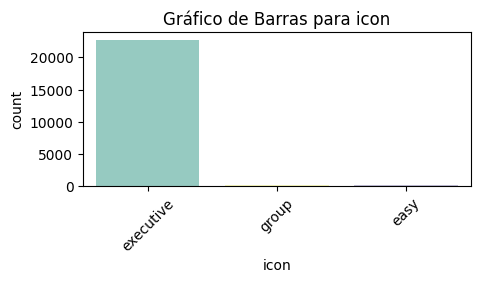

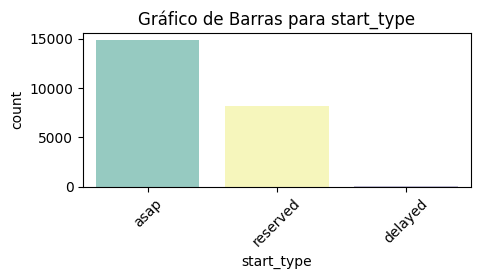

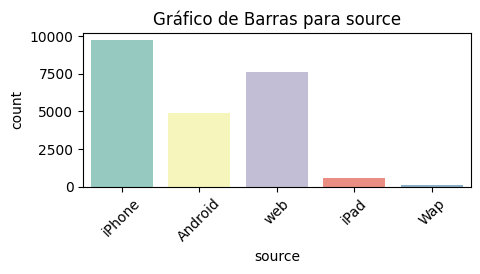

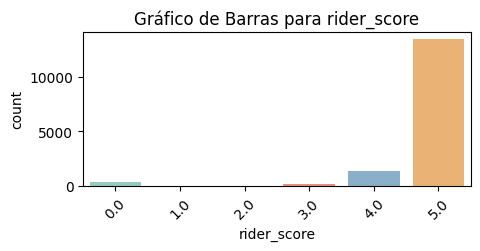

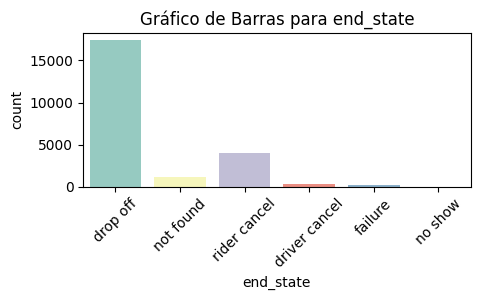

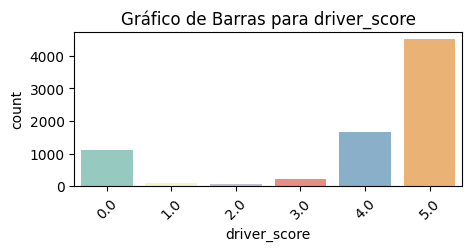

In [ ]:
# Generar un gráfico de barras para cada variable categórica
for columna in var_cat:
    plt.figure(figsize=(5, 2))
    sns.countplot(data=data, x=columna, palette="Set3")  # Puedes cambiar la paleta de colores si lo deseas
    plt.title(f'Gráfico de Barras para {columna}')
    plt.xticks(rotation=45)  # Rotar las etiquetas del eje x para mejor legibilidad
    plt.show()

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23111 entries, 0 to 23110
Data columns (total 28 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   journey_id        23111 non-null  object 
 1   user_id           23111 non-null  object 
 2   driver_id         19726 non-null  object 
 3   taxi_id           19726 non-null  object 
 4   icon              23111 non-null  object 
 5   start_type        23111 non-null  object 
 6   start_at          23111 non-null  object 
 7   start_lat         23111 non-null  object 
 8   start_lon         23111 non-null  object 
 9   end_at            22835 non-null  object 
 10  end_lat           23111 non-null  object 
 11  end_lon           23111 non-null  object 
 12  end_state         23099 non-null  object 
 13  driver_start_lat  19621 non-null  object 
 14  driver_start_lon  19621 non-null  object 
 15  arrived_at        17716 non-null  object 
 16  currency          23111 non-null  object

3. Realizar un análisis univariado de las columnas que considere relevante . Incluya los tipos de gráficos que considere apropiados y comente sus resultados (3 puntos)

Lo primero seria realizar un resumen estadistico descriptivo para tener una idea general de cada variable.

In [ ]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
price,22713.0,2752.738784,3025.390309,0.0,1700.0,1911.0,3597.00,55974.0
price_distance,19941.0,3404.747505,48510.104976,0.0,827.0,1754.0,3256.00,4491910.0
price_duration,19941.0,606.005617,1553.548938,0.0,30.0,247.0,628.00,69839.0
distance,22848.0,10883.953256,202573.499335,0.0,0.0,4660.0,9290.25,14037219.0
duration,22848.0,638.831145,1788.661444,0.0,0.0,218.0,667.00,83807.0
cost,21760.0,2655.032445,17124.801935,0.0,0.0,1450.0,2381.25,525000.0
cost_distance,18038.0,2099.407529,33003.136231,0.0,0.0,1048.0,2230.00,3368792.0
cost_duration,18038.0,401.550504,1148.614398,0.0,0.0,127.0,414.00,48887.0
driver_score,7650.0,3.933333,1.744948,0.0,4.0,5.0,5.00,5.0
rider_score,15390.0,4.755491,0.840558,0.0,5.0,5.0,5.00,5.0


Seria importante identificar los valores outliers de los precios, duracion y distancia, para luego correlacionar unos con otros para verificar que no se trate de un error en la data.

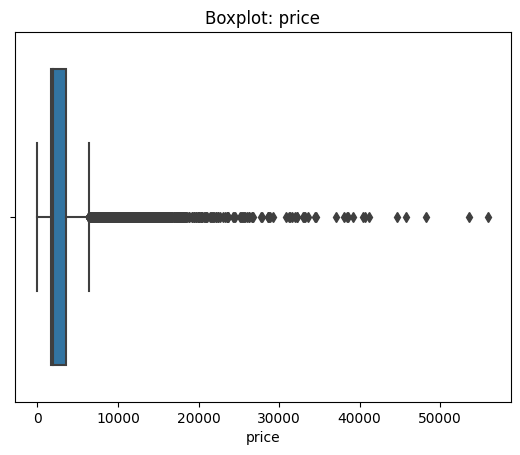

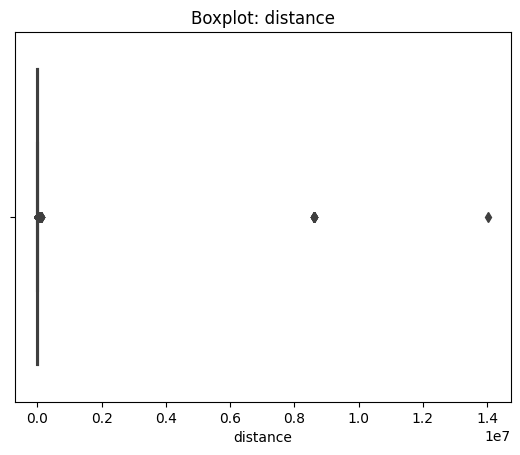

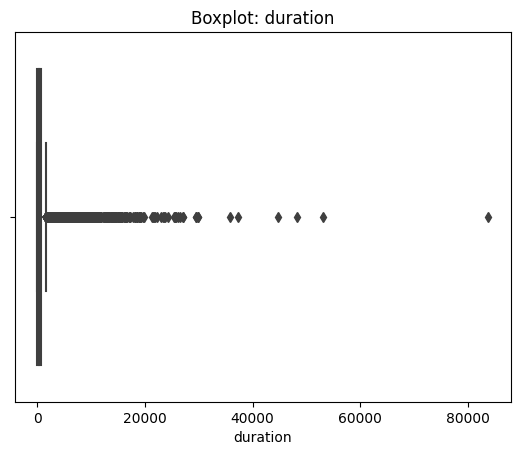

In [ ]:
for i in ['price', 'distance', 'duration']:
  sns.boxplot(data=data, x = i)
  plt.title('Boxplot: {}'.format(i))
  plt.show()


En los tres grafios se puede observar muchos valores outliers que estan bien alejados de media, los cuales se tienen que analizar para determinar que no sea errores en la data.

El campo **start_at** es object, sin emabrgo indica la fecha y hora donde fue tomado el taxi. Podemos convertir a tipo de dato datetime de pandas usando:

In [ ]:
data['start_at'] = pd.to_datetime(data['start_at'], format="%d/%m/%Y %H:%M")

In [ ]:
data.head()

,journey_id,user_id,driver_id,taxi_id,icon,start_type,start_at,start_lat,start_lon,end_at,end_lat,end_lon,end_state,driver_start_lat,driver_start_lon,arrived_at,currency,price,price_distance,price_duration,distance,duration,cost,cost_distance,cost_duration,source,driver_score,rider_score
0,23a1406fc6a11d866e3c82f22eed4d4c,0e9af5bbf1edfe591b54ecdfd7e91e26,583949a89a9ee17d19e3ca4f137b6b4c,b12f4f09c783e29fe0d0ea624530db56,executive,asap,2010-11-16 16:44:00,"-12,13983536","-77,02355957",16/11/2010 17:29,"-12,05537033","-77,0413208",drop off,"-12,10825481","-77,0272739",16/11/2010 17:02,PEN,3821.0,3626.0,195.0,11331.0,234.0,0.0,0.0,0.0,iPhone,5.0,5.0
1,dd2af4715d0dc16eded53afc0e243577,a553c46e3a22fb9c326aeb3d72b3334e,NaN,NaN,executive,asap,2010-06-01 00:34:00,"-12,13874817","-76,99536133",01/06/2010 0:37,"-12,12465668","-77,02886963",not found,NaN,NaN,NaN,PEN,0.0,NaN,NaN,0.0,0.0,0.0,NaN,NaN,iPhone,NaN,NaN
2,dd91e131888064bf7df3ce08f3d4b4ad,a553c46e3a22fb9c326aeb3d72b3334e,NaN,NaN,executive,asap,2010-05-31 05:01:00,"-12,12453079","-77,02780151",31/05/2010 5:04,"-12,13883209","-76,99530029",not found,NaN,NaN,NaN,PEN,0.0,NaN,NaN,0.0,0.0,0.0,NaN,NaN,iPhone,NaN,NaN
3,dd2af4715d0dc16eded53afc0e2466d0,a553c46e3a22fb9c326aeb3d72b3334e,NaN,NaN,executive,asap,2010-06-01 00:29:00,"-12,13885117","-76,99530029",01/06/2010 0:32,"-12,12458801","-77,02896118",not found,NaN,NaN,NaN,PEN,0.0,NaN,NaN,0.0,0.0,0.0,NaN,NaN,iPhone,NaN,NaN
4,85b7eabcf5d84e42dc7629b7d27781af,56772d544fdfa589a020a1ff894a86f7,d665fb9f75ef5d9cd0fd89479380ba78,0accdd3aa5a322f4129fa20b53278c69,executive,reserved,2010-09-11 23:55:00,"-12,08995438","-76,92626953",12/09/2010 1:07,"-12,02223206","-77,10638428",drop off,"-12,08311558","-76,9277072",11/09/2010 23:50,PEN,8227.0,7665.0,562.0,30270.0,715.0,6173.0,5756.0,417.0,iPhone,4.0,5.0


Podemos crear distintos atributos usando el campo start_at:

In [ ]:
data['mes'] = data['start_at'].dt.month
data['year'] = data['start_at'].dt.year
data['date'] = data['start_at'].dt.date
data['hour'] = data['start_at'].dt.hour

data['MonthDayNum'] = data['start_at'].dt.day
data['DayOfWeek'] = data['start_at'].dt.day_name()
data['DayOfWeek_i'] = data['start_at'].dt.weekday

In [ ]:
data.head()

,journey_id,user_id,driver_id,taxi_id,icon,start_type,start_at,start_lat,start_lon,end_at,end_lat,end_lon,end_state,driver_start_lat,driver_start_lon,arrived_at,currency,price,price_distance,price_duration,distance,duration,cost,cost_distance,cost_duration,source,driver_score,rider_score,mes,year,date,hour,MonthDayNum,DayOfWeek,DayOfWeek_i
0,23a1406fc6a11d866e3c82f22eed4d4c,0e9af5bbf1edfe591b54ecdfd7e91e26,583949a89a9ee17d19e3ca4f137b6b4c,b12f4f09c783e29fe0d0ea624530db56,executive,asap,2010-11-16 16:44:00,"-12,13983536","-77,02355957",16/11/2010 17:29,"-12,05537033","-77,0413208",drop off,"-12,10825481","-77,0272739",16/11/2010 17:02,PEN,3821.0,3626.0,195.0,11331.0,234.0,0.0,0.0,0.0,iPhone,5.0,5.0,11,2010,2010-11-16,16,16,Tuesday,1
1,dd2af4715d0dc16eded53afc0e243577,a553c46e3a22fb9c326aeb3d72b3334e,NaN,NaN,executive,asap,2010-06-01 00:34:00,"-12,13874817","-76,99536133",01/06/2010 0:37,"-12,12465668","-77,02886963",not found,NaN,NaN,NaN,PEN,0.0,NaN,NaN,0.0,0.0,0.0,NaN,NaN,iPhone,NaN,NaN,6,2010,2010-06-01,0,1,Tuesday,1
2,dd91e131888064bf7df3ce08f3d4b4ad,a553c46e3a22fb9c326aeb3d72b3334e,NaN,NaN,executive,asap,2010-05-31 05:01:00,"-12,12453079","-77,02780151",31/05/2010 5:04,"-12,13883209","-76,99530029",not found,NaN,NaN,NaN,PEN,0.0,NaN,NaN,0.0,0.0,0.0,NaN,NaN,iPhone,NaN,NaN,5,2010,2010-05-31,5,31,Monday,0
3,dd2af4715d0dc16eded53afc0e2466d0,a553c46e3a22fb9c326aeb3d72b3334e,NaN,NaN,executive,asap,2010-06-01 00:29:00,"-12,13885117","-76,99530029",01/06/2010 0:32,"-12,12458801","-77,02896118",not found,NaN,NaN,NaN,PEN,0.0,NaN,NaN,0.0,0.0,0.0,NaN,NaN,iPhone,NaN,NaN,6,2010,2010-06-01,0,1,Tuesday,1
4,85b7eabcf5d84e42dc7629b7d27781af,56772d544fdfa589a020a1ff894a86f7,d665fb9f75ef5d9cd0fd89479380ba78,0accdd3aa5a322f4129fa20b53278c69,executive,reserved,2010-09-11 23:55:00,"-12,08995438","-76,92626953",12/09/2010 1:07,"-12,02223206","-77,10638428",drop off,"-12,08311558","-76,9277072",11/09/2010 23:50,PEN,8227.0,7665.0,562.0,30270.0,715.0,6173.0,5756.0,417.0,iPhone,4.0,5.0,9,2010,2010-09-11,23,11,Saturday,5


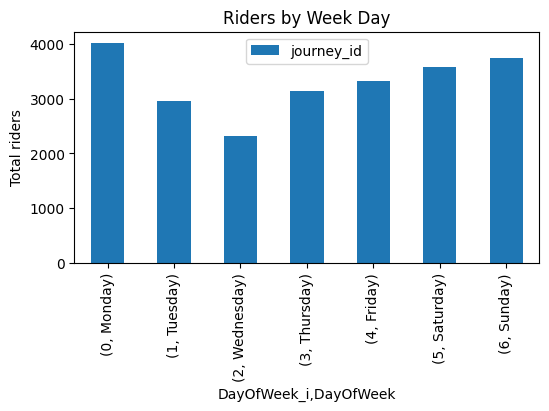

In [ ]:
# Visualicemos la cantidad total de viajes por día de semana.
uber2010_weekdays = data.pivot_table(index=['DayOfWeek_i','DayOfWeek'],
                                  values='journey_id',
                                  aggfunc='count')
uber2010_weekdays.plot(kind='bar', figsize=(6,3))
plt.ylabel('Total riders')
#plt.set_xticklabels(x_labels)
plt.title('Riders by Week Day');

4. Mostrar gráficos de barras o líneas para identificar patrones de viajes. ( 6 puntos)
- Los viajes son más frecuentes los fines de semana o durante la semana?
- ¿Cómo es la tendencia mes a mes? A qué se debe esto?
- ¿Cómo varía la distribución a lo largo del día? Existen diferencias entre los distintos tipos de viajes?
- ¿Si hacemos un gráfico diario existen patrones o comportamientos interesantes en algunos días en particular?

Segun el grafico de barras "Riders by Week Day", se puede notar que los fines de semana es más demanda el servicio de taxi por Uber.

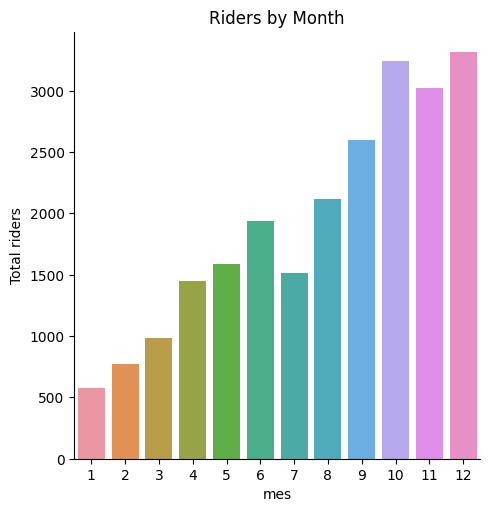

In [ ]:
# Variacion
sns.catplot(x='mes',data = data, kind='count')
plt.ylabel('Total riders')
plt.title('Riders by Month');


Vemos que la tendecia mes a mes es a aumentar, probablemente se estaba haciendo más conocido en la población por eso la tendencia, también vemos que hay un bajon en el mes de julio, ahi probablemente es porque muchas personas toman vacacienes de medio año y esten fuera de la ciudad.

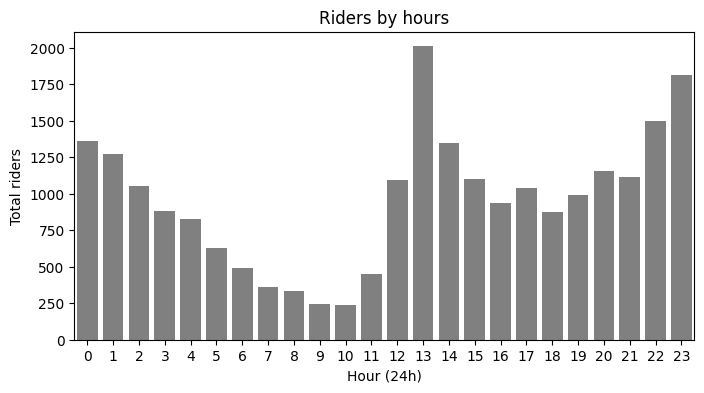

In [ ]:
# Variación de la distribución a lo largo del día.
plt.figure(figsize=(8, 4))
sns.countplot(x='hour',data = data, palette = ["gray"])
plt.xlabel('Hour (24h)')
plt.ylabel('Total riders')
plt.title('Riders by hours');

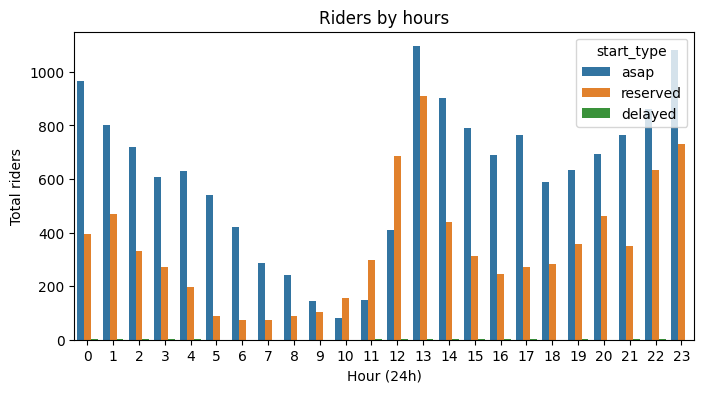

In [ ]:
plt.figure(figsize=(8, 4))
sns.countplot(x='hour',data = data, hue = 'start_type')
plt.xlabel('Hour (24h)')
plt.ylabel('Total riders')
plt.title('Riders by hours');
plt.show()

En la gráfica se observa que en la mañana hay menos demanda que va incrementndoce llegando hasta el pico más alto a las 13 horas del día el cual decae hasta comensar la noche donde empieza a incrementarce la demanda llegando a su segundo pico mas alto a las 23 horas.
La misma tendencia ya mencionada se mantiene entre los distintos tipos de viajes, excepto en los retrasados que no aparece en la gráfica.

<Axes: xlabel='date'>

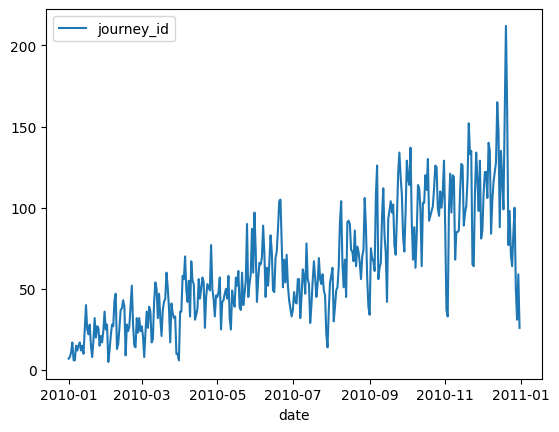

In [ ]:
data.groupby('date').agg({'journey_id':'count'}).plot()

## Análisis Geo Espacial

In [ ]:
import geopandas as gpd

In [ ]:
# Convertimos nuestro dataframe a un GeoDataframe en pandas
data.head()

,journey_id,user_id,driver_id,taxi_id,icon,start_type,start_at,start_lat,start_lon,end_at,end_lat,end_lon,end_state,driver_start_lat,driver_start_lon,arrived_at,currency,price,price_distance,price_duration,distance,duration,cost,cost_distance,cost_duration,source,driver_score,rider_score,mes,year,date,hour,MonthDayNum,DayOfWeek,DayOfWeek_i
0,23a1406fc6a11d866e3c82f22eed4d4c,0e9af5bbf1edfe591b54ecdfd7e91e26,583949a89a9ee17d19e3ca4f137b6b4c,b12f4f09c783e29fe0d0ea624530db56,executive,asap,2010-11-16 16:44:00,"-12,13983536","-77,02355957",16/11/2010 17:29,"-12,05537033","-77,0413208",drop off,"-12,10825481","-77,0272739",16/11/2010 17:02,PEN,3821.0,3626.0,195.0,11331.0,234.0,0.0,0.0,0.0,iPhone,5.0,5.0,11,2010,2010-11-16,16,16,Tuesday,1
1,dd2af4715d0dc16eded53afc0e243577,a553c46e3a22fb9c326aeb3d72b3334e,NaN,NaN,executive,asap,2010-06-01 00:34:00,"-12,13874817","-76,99536133",01/06/2010 0:37,"-12,12465668","-77,02886963",not found,NaN,NaN,NaN,PEN,0.0,NaN,NaN,0.0,0.0,0.0,NaN,NaN,iPhone,NaN,NaN,6,2010,2010-06-01,0,1,Tuesday,1
2,dd91e131888064bf7df3ce08f3d4b4ad,a553c46e3a22fb9c326aeb3d72b3334e,NaN,NaN,executive,asap,2010-05-31 05:01:00,"-12,12453079","-77,02780151",31/05/2010 5:04,"-12,13883209","-76,99530029",not found,NaN,NaN,NaN,PEN,0.0,NaN,NaN,0.0,0.0,0.0,NaN,NaN,iPhone,NaN,NaN,5,2010,2010-05-31,5,31,Monday,0
3,dd2af4715d0dc16eded53afc0e2466d0,a553c46e3a22fb9c326aeb3d72b3334e,NaN,NaN,executive,asap,2010-06-01 00:29:00,"-12,13885117","-76,99530029",01/06/2010 0:32,"-12,12458801","-77,02896118",not found,NaN,NaN,NaN,PEN,0.0,NaN,NaN,0.0,0.0,0.0,NaN,NaN,iPhone,NaN,NaN,6,2010,2010-06-01,0,1,Tuesday,1
4,85b7eabcf5d84e42dc7629b7d27781af,56772d544fdfa589a020a1ff894a86f7,d665fb9f75ef5d9cd0fd89479380ba78,0accdd3aa5a322f4129fa20b53278c69,executive,reserved,2010-09-11 23:55:00,"-12,08995438","-76,92626953",12/09/2010 1:07,"-12,02223206","-77,10638428",drop off,"-12,08311558","-76,9277072",11/09/2010 23:50,PEN,8227.0,7665.0,562.0,30270.0,715.0,6173.0,5756.0,417.0,iPhone,4.0,5.0,9,2010,2010-09-11,23,11,Saturday,5


In [ ]:
# Tomaremos como referencia la ubicación en donde fue tomado el taxi: start_lat , start_lon. Antes debemos convertir a número
data[['start_lat','start_lon']]

,start_lat,start_lon
0,"-12,13983536","-77,02355957"
1,"-12,13874817","-76,99536133"
2,"-12,12453079","-77,02780151"
3,"-12,13885117","-76,99530029"
4,"-12,08995438","-76,92626953"
...,...,...
23106,"-12,08974075","-77,04699707"
23107,"-12,09253011","-77,02875271"
23108,"-12,1275637","-77,02642288"
23109,"-12,019468","-77,1077669"


In [ ]:
data[['start_lat','start_lon']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23111 entries, 0 to 23110
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   start_lat  23111 non-null  object
 1   start_lon  23111 non-null  object
dtypes: object(2)
memory usage: 361.2+ KB


In [ ]:
data['latitude'] = data['start_lat'].str.replace(',','.')
data['longitude'] = data['start_lon'].str.replace(',','.')

In [ ]:
data['latitude'] = data['latitude'].astype('float')
data['longitude'] = data['longitude'].astype('float')

In [ ]:
data_geo = gpd.GeoDataFrame(
    data, geometry=gpd.points_from_xy(data.longitude, data.latitude), crs="EPSG:4326"
)

In [ ]:
type(data_geo)

geopandas.geodataframe.GeoDataFrame

In [ ]:
# Leemos información de los distritos
lima_dis = gpd.read_file('https://raw.githubusercontent.com/joseluisq/peru-geojson-datasets/master/lima_callao_distritos.geojson')

In [ ]:
lima_dis.head()

,id,departamento,provincia,distrito,institucion,distrito2,geometry
0,2,LIMA,LIMA,SAN BORJA,IGN,San Borja,"MULTIPOLYGON (((-76.98587 -12.08173, -76.98585..."
1,6,LIMA,LIMA,JESUS MARIA,IGN,None,"MULTIPOLYGON (((-77.04242 -12.08297, -77.04311..."
2,7,LIMA,LIMA,PACHACAMAC,IGN,None,"MULTIPOLYGON (((-76.87588 -12.07350, -76.87582..."
3,10,LIMA,LIMA,SAN LUIS,IGN,None,"MULTIPOLYGON (((-76.99780 -12.06084, -76.99810..."
4,12,LIMA,LIMA,LA MOLINA,IGN,None,"MULTIPOLYGON (((-76.94139 -12.06207, -76.94137..."


In [ ]:
# Join espacial para agregar información de distritos:
data_geo_dis = data_geo.sjoin(lima_dis[['provincia','distrito','geometry']])

In [ ]:
data_geo_dis

,journey_id,user_id,driver_id,taxi_id,icon,start_type,start_at,start_lat,start_lon,end_at,end_lat,end_lon,end_state,driver_start_lat,driver_start_lon,arrived_at,currency,price,price_distance,price_duration,distance,duration,cost,cost_distance,cost_duration,source,driver_score,rider_score,mes,year,date,hour,MonthDayNum,DayOfWeek,DayOfWeek_i,latitude,longitude,geometry,index_right,provincia,distrito
0,23a1406fc6a11d866e3c82f22eed4d4c,0e9af5bbf1edfe591b54ecdfd7e91e26,583949a89a9ee17d19e3ca4f137b6b4c,b12f4f09c783e29fe0d0ea624530db56,executive,asap,2010-11-16 16:44:00,"-12,13983536","-77,02355957",16/11/2010 17:29,"-12,05537033","-77,0413208",drop off,"-12,10825481","-77,0272739",16/11/2010 17:02,PEN,3821.0,3626.0,195.0,11331.0,234.0,0.0,0.0,0.0,iPhone,5.0,5.0,11,2010,2010-11-16,16,16,Tuesday,1,-12.139835,-77.023560,POINT (-77.02356 -12.13984),38,LIMA,BARRANCO
59,fdf02c2d7b2dd9c0c7eb0b0b729cc655,649d38ea6680a3f6ee4a4b734f508d9d,d665fb9f75ef5d9cd0fd89479380ba78,0accdd3aa5a322f4129fa20b53278c69,executive,asap,2010-06-02 10:29:00,"-12,14313126","-77,01556396",02/06/2010 11:07,"-12,13913727","-76,99572754",drop off,"-12,11695433","-77,02999592",02/06/2010 10:50,PEN,1942.0,1797.0,145.0,5616.0,174.0,1700.0,1348.0,107.0,iPhone,5.0,5.0,6,2010,2010-06-02,10,2,Wednesday,2,-12.143131,-77.015564,POINT (-77.01556 -12.14313),38,LIMA,BARRANCO
108,443ccdfd1345a761a544f8cf428e3bca,761a1b1e8e4103f2ac5a425564328a45,NaN,NaN,executive,reserved,2010-10-12 06:05:00,"-12,14638901","-77,01852417",12/10/2010 5:20,"-12,10471725","-76,99841309",rider cancel,NaN,NaN,NaN,PEN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,iPhone,NaN,NaN,10,2010,2010-10-12,6,12,Tuesday,1,-12.146389,-77.018524,POINT (-77.01852 -12.14639),38,LIMA,BARRANCO
109,532278dfa8891ad6dd958337e4cc9a16,761a1b1e8e4103f2ac5a425564328a45,d04f1a596fe4a582f48e6eb2f9e8f617,d04f1a596fe4a582f48e6eb2f9e8cceb,executive,reserved,2010-10-12 06:30:00,"-12,146492","-77,01852417",12/10/2010 6:42,"-12,10716248","-76,99749756",drop off,"-12,12915486","-77,03593338",12/10/2010 6:24,PEN,2557.0,2557.0,0.0,7990.0,0.0,1918.0,1918.0,0.0,iPhone,2.0,3.0,10,2010,2010-10-12,6,12,Tuesday,1,-12.146492,-77.018524,POINT (-77.01852 -12.14649),38,LIMA,BARRANCO
152,f622a9397b85b5c9c0ef938c5d57be64,f420a3daee4777127e9eaa907eb5818e,ae06c34243f741e203e97c48ebcbd9da,f622a9397b85b5c9c0ef938c5d592020,executive,asap,2010-09-07 05:13:00,"-12,13978577","-77,02429199",07/09/2010 5:47,"-12,11179352","-77,0357666",drop off,"-12,08104022","-77,06651466",07/09/2010 5:35,PEN,1700.0,1498.0,1.0,4680.0,1.0,1450.0,1123.0,1.0,iPhone,NaN,5.0,9,2010,2010-09-07,5,7,Tuesday,1,-12.139786,-77.024292,POINT (-77.02429 -12.13979),38,LIMA,BARRANCO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15757,d439fbb315b2966b8c84e219ecda2701,dd23cf0ef33ae44e0c0b4c756e1fe4e8,eef4aeee867d60d44e1d077d16054b6a,294e869d187357cad25b8af65aa860e8,executive,asap,2010-12-01 00:39:00,"-12,0274637","-76,99573103",01/12/2010 1:42,"-12,03134817","-77,02858239",drop off,"-12,0278311","-76,99483568",01/12/2010 0:40,PEN,5479.0,3687.0,1792.0,11523.0,2141.0,4092.0,2766.0,1326.0,Android,5.0,5.0,12,2010,2010-12-01,0,1,Wednesday,2,-12.027464,-76.995731,POINT (-76.99573 -12.02746),44,LIMA,EL AGUSTINO
16235,1d8ba0bdacccf2d0d70ee9925185bca8,2894d770d508897b1e067c5834da8d57,eef4aeee867d60d44e1d077d16054b6a,294e869d187357cad25b8af65aa860e8,executive,asap,2010-11-26 19:55:00,"-12,0296801","-76,9802825",26/11/2010 21:04,"-12,0959365","-77,0375824",drop off,"-12,09486028","-76,96214755",26/11/2010 20:24,PEN,6226.0,5928.0,298.0,19189.0,356.0,4669.0,4448.0,221.0,web,NaN,5.0,11,2010,2010-11-26,19,26,Friday,4,-12.029680,-76.980283,POINT (-76.98028 -12.02968),44,LIMA,EL AGUSTINO
17125,cd6fba80de11849ce566009f41bd9bf2,d51ec809ccecd882cbdb357b5a5188ba,17c21284245ff240c7212732991c2373,716a697375634f32a06d692b0448f13d,executive,asap,2010-11-28 17:27:00,"-12,02765783","-76,99486166",28/11/2010 18:23,

In [ ]:
# Cantidad de viajes por distrito
df =data_geo_dis.groupby('distrito').agg({'journey_id':'count','price':'mean', 'distance':'mean'}).reset_index().sort_values('journey_id',ascending=False)
df

,distrito,journey_id,price,distance
30,SAN ISIDRO,5643,2540.388789,11107.159311
38,SANTIAGO DE SURCO,5134,2602.895755,9710.817342
22,MIRAFLORES,4925,2447.356731,7543.368098
29,SAN BORJA,1233,3329.310855,14280.082034
39,SURQUILLO,981,2044.014493,21466.870637
12,LA MOLINA,911,3384.642377,18598.272525
4,CALLAO,856,5279.665459,13086.206483
1,BARRANCO,624,2718.758170,7221.827642
16,LIMA,478,2733.158351,6841.161359
11,JESUS MARIA,374,2576.541311,6308.131285


5. Realize gráficos y análisis usando la información Geoespacial (8 puntos).
* Cantidad de viajes realizados por distrito y su relación con precio, distancia, recorrida.
* Existe algún patrón diferenciado de taxis tomados en ciertos distritos a lo largo del día.
* Con la información de end_lat end_lon se podría aproximar la distancia total (distancia euclidiana) del viaje. Este valor guarda relación con la columna distance?
* Hay patronoes diferenciados sobre el uso de web,Android o Iphone por cada distrito?
* Los viajes en los distritos céntricos en la ciudad son generalmente más cortos o más largos, y hay alguna influencia en el precio?
* Se observa que hay muchos viajes que inician o terminan en el Aeropuerto. Existe algún patrón desde/hacia donde van generalmente esos viajes?
* Incluya cualquier otra información relevante que se puede derivar del análisis geo espacial.
* Puede usar https://kepler.gl/demo para visualizar los datos

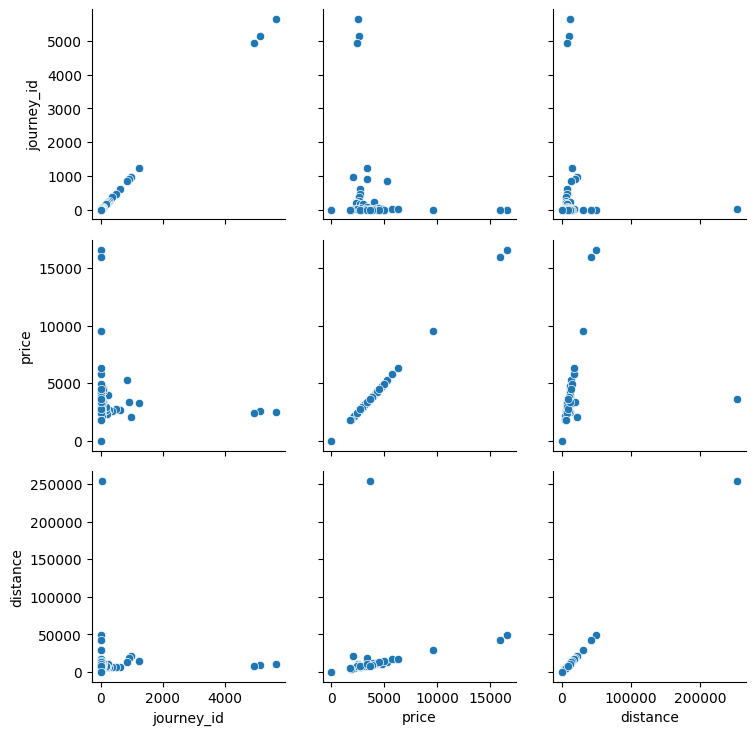

In [ ]:
# correlacion viajes realizados por distrito y su relación con precio, distancia recorrida.
g = sns.PairGrid(df)
g.map(sns.scatterplot)

En la grafica anterior se observa que hay puntos que no guardan correlacion con la tendencia, lo mejor seria identificar esos puntos y filtrar.

<Axes: xlabel='distance', ylabel='price'>

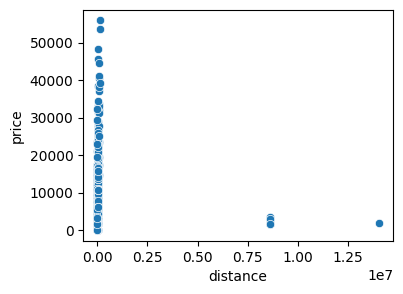

In [ ]:
plt.figure(figsize=(4, 3))
sns.scatterplot(x='distance', y='price', data=data_geo_dis)

En esta gráfica se observa claramente los puntos outlier que deben ser datos erroneos en la data, lo mejor seria filtrar solo los datos buenos

<Axes: xlabel='distance', ylabel='price'>

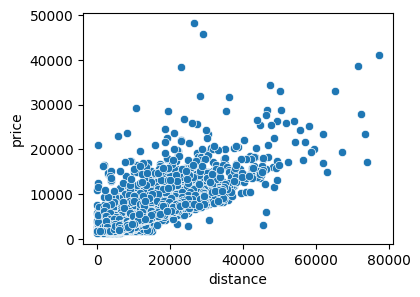

In [ ]:
# hacemos un filtro de los datos para descartar los valores outliers que malogran el gráfico.
dg_filtro = data_geo_dis[(data_geo_dis['distance'] > 0) & (data_geo_dis['distance'] < 80000) & (data_geo_dis['price'] > 0)]
plt.figure(figsize=(4, 3))
sns.scatterplot(x='distance', y='price', data=dg_filtro)

In [ ]:
# volvemos a calcular la cantidad de viajes por distrito
dis =dg_filtro.groupby('distrito').agg({'journey_id':'count','price':'mean', 'distance':'mean'}).reset_index().sort_values('journey_id',ascending=False)
dis.rename(columns={'journey_id':'Cantidad_de_viajes'}, inplace=True)
dis

,distrito,Cantidad_de_viajes,price,distance
30,SAN ISIDRO,4295,3191.421886,7052.896624
22,MIRAFLORES,3702,3124.583739,7593.270935
38,SANTIAGO DE SURCO,3543,3534.447079,9079.663844
29,SAN BORJA,860,4259.537209,9629.333721
39,SURQUILLO,642,2614.900312,5737.062305
12,LA MOLINA,622,4759.691318,13049.971061
4,CALLAO,588,7284.232993,18496.510204
1,BARRANCO,428,3873.317757,10377.158879
16,LIMA,314,3804.687898,9956.175159
11,JESUS MARIA,263,3386.638783,8586.733840


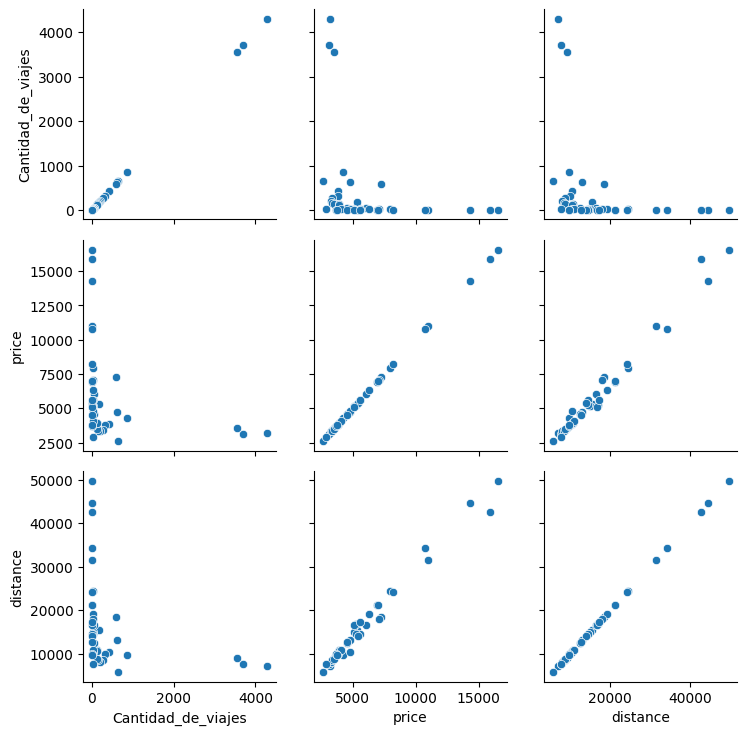

In [ ]:
# volvemos hacer la correlacion viajes realizados por distrito y su relación con precio, distancia recorrida.
g = sns.PairGrid(dis)
g.map(sns.scatterplot)

En el gráfico anterior se observa que hay que hay una clara correlacion entre el precio y la distancia recorrida pero estos a la vez no tienen ninguna relacion con la cantidad de viajes por distrito.

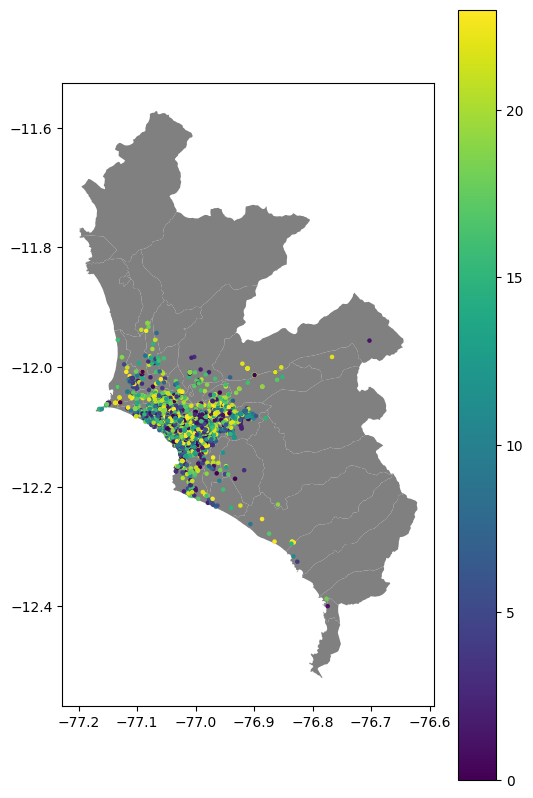

In [ ]:
# Existe algún patrón diferenciado de taxis tomados en ciertos distritos a lo largo del día.
base = lima_dis.plot(color='gray',figsize=(6, 10))
dg_filtro.plot(ax=base, marker='o', markersize=5, column='hour', legend=True);

Este mapa no se puede distiguir si hay algun patrón, por la tanto hare un pivot table de los datos filtrados para poder crear un mapa de calor y ver si existe algún patron.

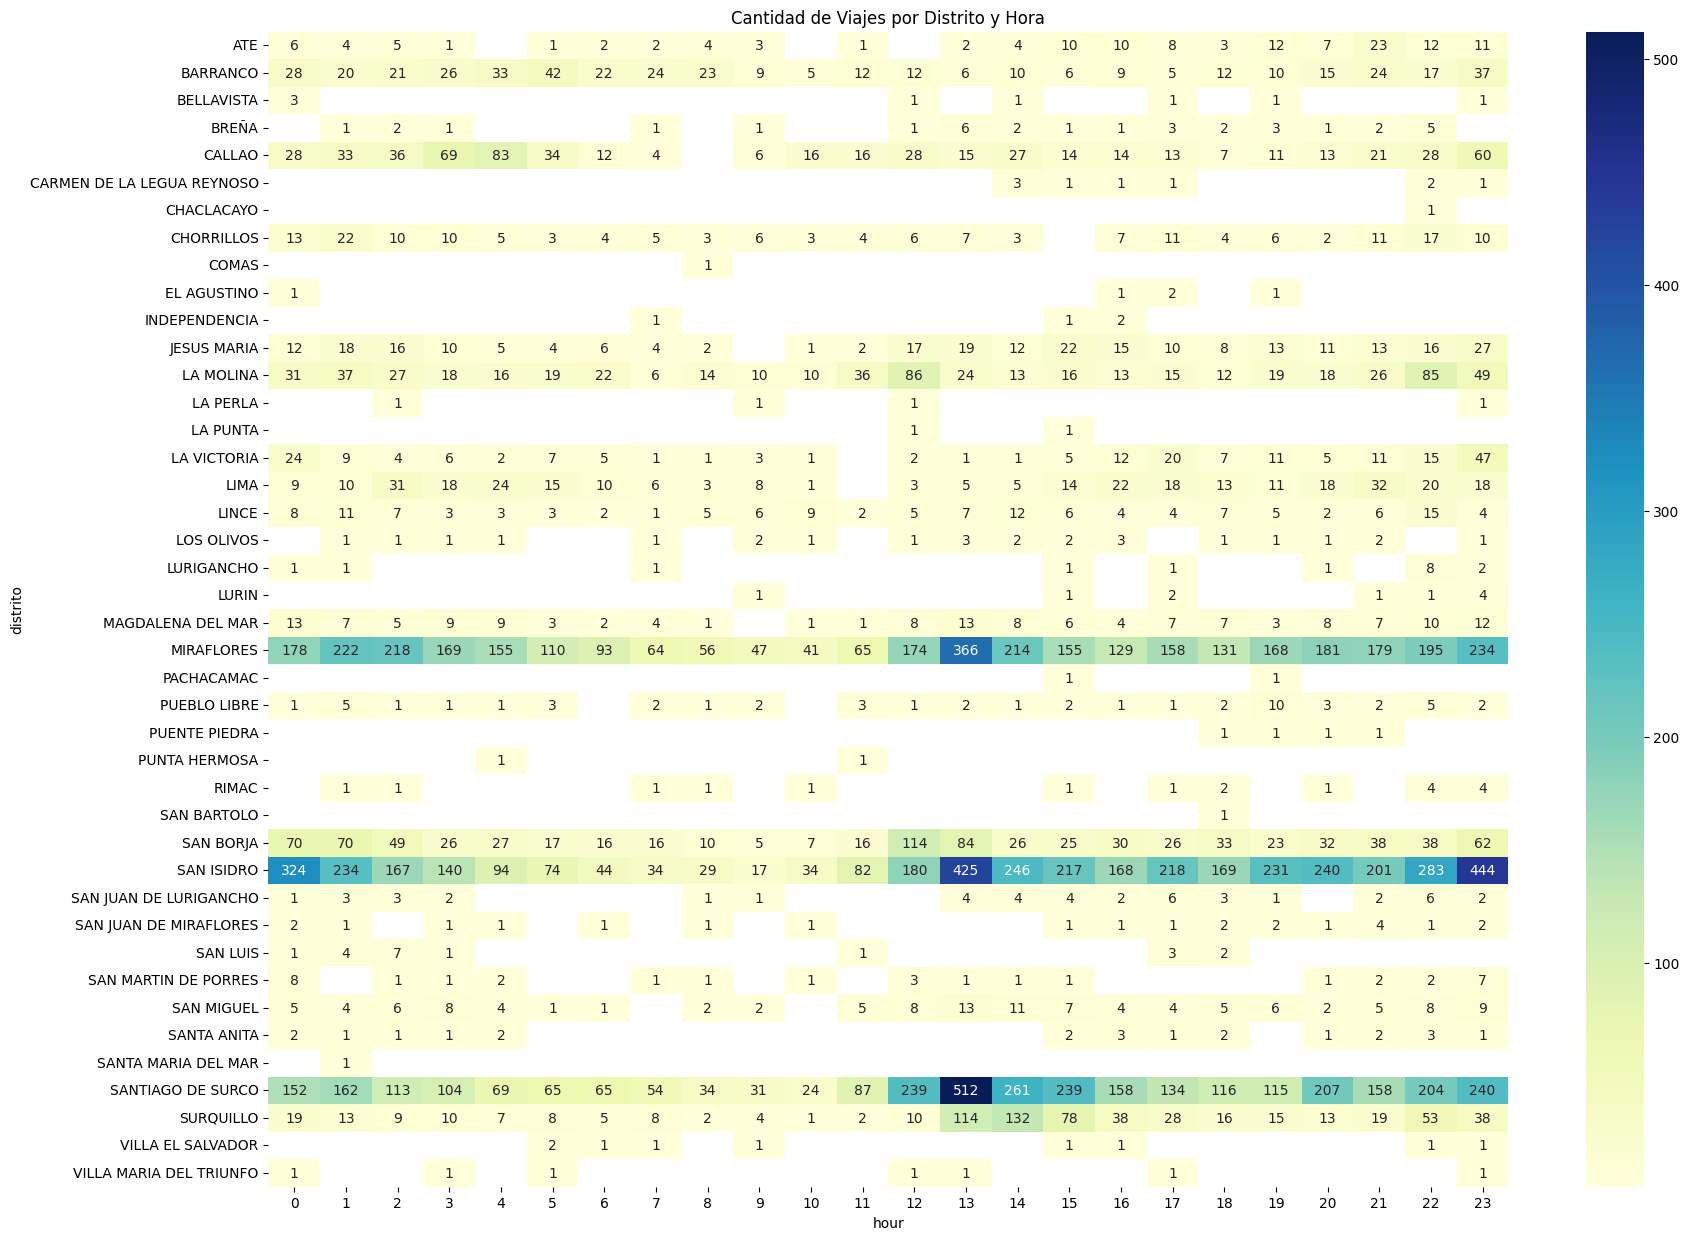

In [ ]:
pivot_table = dg_filtro.pivot_table(index='distrito', columns='hour', values='journey_id', aggfunc='count')
plt.figure(figsize=(20, 15))
sns.heatmap(pivot_table, cmap='YlGnBu', annot=True, fmt='g')
plt.title('Cantidad de Viajes por Distrito y Hora')
plt.show()

En el mapa de calor se observa claramente que a las 13 horas del dia hay más clientes en los distritos de Miraflores, San Isidro y Santiago.

Con la información de end_lat end_lon se podría aproximar la distancia total (distancia euclidiana) del viaje. Este valor guarda relación con la columna distance?

La respuesta es que si se podria calcular la distancia con la formula haversina, que es utilizada para calcular la distancia entre dos puntos geográficos en la superficie de la Tierra.

In [ ]:
dg_filtro.sample(3)

,journey_id,user_id,driver_id,taxi_id,icon,start_type,start_at,start_lat,start_lon,end_at,end_lat,end_lon,end_state,driver_start_lat,driver_start_lon,arrived_at,currency,price,price_distance,price_duration,distance,duration,cost,cost_distance,cost_duration,source,driver_score,rider_score,mes,year,date,hour,MonthDayNum,DayOfWeek,DayOfWeek_i,latitude,longitude,geometry,index_right,provincia,distrito
22645,5de65d376dbc96242752bf2d30f1cdf8,ff0448023dec846359f954a4742b7db3,d665fb9f75ef5d9cd0fd89479380ba78,16cbe35db7fff70fbc8251b4cda9fdc9,executive,asap,2010-11-01 03:45:00,"-12,09593582","-77,03756714",01/11/2010 4:28,"-12,13062668","-77,00912476",drop off,"-12,09668732","-77,03686523",01/11/2010 3:55,PEN,2971.0,2314.0,657.0,7230.0,789.0,0.0,0.0,0.0,iPhone,5.0,5.0,11,2010,2010-11-01,3,1,Monday,0,-12.095936,-77.037567,POINT (-77.03757 -12.09594),49,LIMA,SAN ISIDRO
18686,a553c46e3a22fb9c326aeb3d72b5148e,4c37542f88f6bc6fb2465a93be210506,56f59b58bcbbd1cdabc3652e713134c2,924d4f0e7554566623e8ebb3904a7b0c,executive,reserved,2010-05-17 21:00:00,"-12,10565567","-76,97564697",17/05/2010 21:13,"-12,1257515","-76,97747803",drop off,"-12,12750787","-77,01066927",17/05/2010 20:59,PEN,1700.0,742.0,252.0,2320.0,302.0,1700.0,520.0,176.0,iPhone,NaN,5.0,5,2010,2010-05-17,21,17,Monday,0,-12.105656,-76.975647,POINT (-76.97565 -12.10566),7,LIMA,SANTIAGO DE SURCO
16727,532278dfa8891ad6dd958337e4cf67de,16cbe35db7fff70fbc8251b4cdc843b1,fb81277200c0aea311ad85f90d548d5a,fb81277200c0aea311ad85f90d733b00,executive,reserved,2010-10-11 23:30:00,"-12,05906967","-77,12926816",12/10/2010 0:21,"-12,02167658","-77,10719593",drop off,"-12,04392201","-77,10771699",11/10/2010 23:27,PEN,2927.0,1949.0,978.0,6090.0,1174.0,2186.0,1462.0,724.0,Android,5.0,5.0,10,2010,2010-10-11,23,11,Monday,0,-12.059070,-77.129268,POINT (-77.12927 -12.05907),9,CALLAO,CALLAO


In [ ]:
dg_filtro['latitude_2'] = dg_filtro['end_lat'].str.replace(',','.')
dg_filtro['longitude_2'] = dg_filtro['end_lon'].str.replace(',','.')

/usr/local/lib/python3.10/dist-packages/geopandas/geodataframe.py:1538: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
/usr/local/lib/python3.10/dist-packages/geopandas/geodataframe.py:1538: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


In [ ]:
dg_filtro['latitude_2'] = dg_filtro['latitude_2'].astype('float')
dg_filtro['longitude_2'] = dg_filtro['longitude_2'].astype('float')

In [ ]:
dg_filtro.sample(3)

,journey_id,user_id,driver_id,taxi_id,icon,start_type,start_at,start_lat,start_lon,end_at,end_lat,end_lon,end_state,driver_start_lat,driver_start_lon,arrived_at,currency,price,price_distance,price_duration,distance,duration,cost,cost_distance,cost_duration,source,driver_score,rider_score,mes,year,date,hour,MonthDayNum,DayOfWeek,DayOfWeek_i,latitude,longitude,geometry,index_right,provincia,distrito,latitude_2,longitude_2
19831,eed13b680fcb702eba8375781c856d46,1199f830a03cd75df5e7a7cc7ca8a20c,ff5c924e0b630fd7c019a4234059fdf4,16cbe35db7fff70fbc8251b4cdaa06cb,executive,asap,2010-09-02 12:22:00,"-12,11058044","-77,03988647",02/09/2010 13:04,"-12,09136963","-76,97366333",drop off,"-12,11546662","-77,02676445",02/09/2010 12:33,PEN,3141.0,2992.0,149.0,9350.0,179.0,0.0,0.0,0.0,iPhone,4.0,5.0,9,2010,2010-09-02,12,2,Thursday,3,-12.110580,-77.039886,POINT (-77.03989 -12.11058),23,LIMA,MIRAFLORES,-12.091370,-76.973663
15896,c21605b791b47423867a99d06f8500fc,d2f1475850c213560abdec5deae2dc97,eef4aeee867d60d44e1d077d16054b6a,294e869d187357cad25b8af65aa860e8,executive,asap,2010-04-04 20:36:00,"-12,094919","-77,0589021",04/04/2010 21:37,"-12,1251503","-77,0338408",drop off,"-12,1036573","-77,02775074",04/04/2010 21:03,PEN,3078.0,2197.0,881.0,6866.0,1057.0,2300.0,1648.0,652.0,web,NaN,NaN,4,2010,2010-04-04,20,4,Sunday,6,-12.094919,-77.058902,POINT (-77.05890 -12.09492),48,LIMA,MAGDALENA DEL MAR,-12.125150,-77.033841
5582,ac46e4f81684b4d6b5ad4fa76ee5d0d6,caa7a1b7f11b99895d9991c3635fd51d,e84fda9c5df33f03c89b6923c361fb35,78851a91f305d3ed7bb3cc0111e35154,executive,asap,2010-10-15 21:32:00,"-12,08280945","-77,05169678",15/10/2010 22:51,"-12,04817581","-77,034729",drop off,"-12,0819397","-77,05169678",15/10/2010 21:46,PEN,4295.0,3254.0,1041.0,10170.0,1249.0,0.0,0.0,0.0,iPad,4.0,5.0,10,2010,2010-10-15,21,15,Friday,4,-12.082809,-77.051697,POINT (-77.05170 -12.08281),1,LIMA,JESUS MARIA,-12.048176,-77.034729


In [ ]:
dg_filtro.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 16521 entries, 0 to 21565
Data columns (total 43 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   journey_id        16521 non-null  object        
 1   user_id           16521 non-null  object        
 2   driver_id         16521 non-null  object        
 3   taxi_id           16521 non-null  object        
 4   icon              16521 non-null  object        
 5   start_type        16521 non-null  object        
 6   start_at          16521 non-null  datetime64[ns]
 7   start_lat         16521 non-null  object        
 8   start_lon         16521 non-null  object        
 9   end_at            16520 non-null  object        
 10  end_lat           16521 non-null  object        
 11  end_lon           16521 non-null  object        
 12  end_state         16521 non-null  object        
 13  driver_start_lat  16393 non-null  object        
 14  driver_start_l

In [ ]:
import math
def haversine_distance(clat1, clon1, clat2, clon2):
    lat1, lon1 = math.radians(clat1), math.radians(clon1)
    lat2, lon2 = math.radians(clat2), math.radians(clon2)
    dlat = lat2 - lat1
    dlon = lon2 - lon1
    # Fórmula de Haversine
    a = math.sin(dlat / 2)**2 + math.cos(lat1) * math.cos(lat2) * math.sin(dlon / 2)**2
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1 - a))
    # 6371.0 es el radio de la tierra y 1000 para que sea en metros.
    distance = 6371.0 * c *1000
    return distance

In [ ]:
dg_filtro["distancia_euclidiana"] = dg_filtro.apply(lambda row : haversine_distance(row['latitude'], row['longitude'], row['latitude_2'], row['longitude_2']), axis=1)
dg_filtro["distancia_euclidiana"] = dg_filtro["distancia_euclidiana"].round()


/usr/local/lib/python3.10/dist-packages/geopandas/geodataframe.py:1538: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


,journey_id,user_id,driver_id,taxi_id,icon,start_type,start_at,start_lat,start_lon,end_at,end_lat,end_lon,end_state,driver_start_lat,driver_start_lon,arrived_at,currency,price,price_distance,price_duration,distance,duration,cost,cost_distance,cost_duration,source,driver_score,rider_score,mes,year,date,hour,MonthDayNum,DayOfWeek,DayOfWeek_i,latitude,longitude,geometry,index_right,provincia,distrito,latitude_2,longitude_2,distancia_euclidiana
22415,53699c4aac0da3f8ba9c1fe1e0a07071,ae06c34243f741e203e97c48eb42017b,17c21284245ff240c7212732991c2373,716a697375634f32a06d692b0448f13d,executive,asap,2010-11-29 17:41:00,"-12,098176","-76,971417",29/11/2010 18:16,"-12,1005158","-76,9931074",drop off,0,0,29/11/2010 17:59,PEN,1700.0,1290.0,198.0,4032.0,236.0,1450.0,903.0,139.0,web,NaN,5.0,11,2010,2010-11-29,17,29,Monday,0,-12.098176,-76.971417,POINT (-76.97142 -12.09818),7,LIMA,SANTIAGO DE SURCO,-12.100516,-76.993107,2373.0
19134,b7a3cd05f915f710abbbf0dbaa815f8a,2e51db3a8a77aa594aa686ff19e0af38,ff5c924e0b630fd7c019a4234059fdf4,16cbe35db7fff70fbc8251b4cdaa06cb,executive,asap,2010-07-01 15:58:00,"-12,0088501","-77,009552",01/07/2010 17:12,"-12,09202576","-77,0269165",drop off,"-12,09407414","-77,03119376",01/07/2010 16:36,PEN,4248.0,3760.0,488.0,11750.0,586.0,NaN,NaN,NaN,iPhone,4.0,5.0,7,2010,2010-07-01,15,1,Thursday,3,-12.008850,-77.009552,POINT (-77.00955 -12.00885),47,LIMA,SAN JUAN DE LURIGANCHO,-12.092026,-77.026916,9440.0
10766,e49eb2cdf4d249c5eba673cb800c5d44,abb8a5727fb8c8fae10cd1b24ed6dc80,ec84a73745199ff840ecafcb924383ad,c2ed6bdd0113ad6f195e8586932279ba,executive,asap,2010-10-03 00:47:00,"-12,0740011","-76,9578826",03/10/2010 1:53,"-12,1324599","-77,0222712",drop off,"-12,12284446","-76,99890375",03/10/2010 1:32,PEN,4646.0,4646.0,0.0,14520.0,0.0,0.0,0.0,0.0,web,5.0,5.0,10,2010,2010-10-03,0,3,Sunday,6,-12.074001,-76.957883,POINT (-76.95788 -12.07400),4,LIMA,LA MOLINA,-12.132460,-77.022271,9553.0


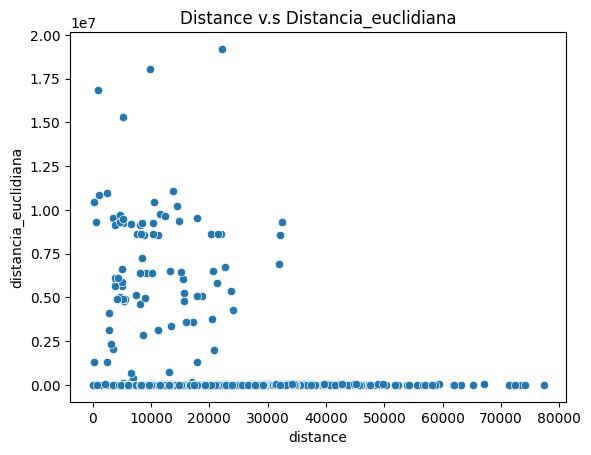

In [ ]:
sns.scatterplot(data=dg_filtro, x='distance', y ='distancia_euclidiana')
plt.title('Distance v.s Distancia_euclidiana')
plt.show()

Text(0.5, 1.0, 'Box Plot: Distancia_euclidiana')

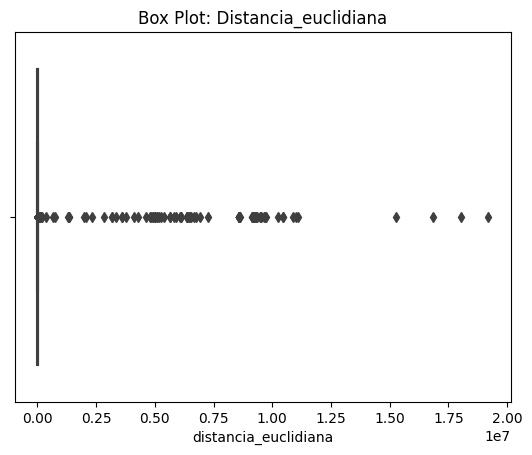

In [ ]:
sns.boxplot(data=dg_filtro, x='distancia_euclidiana')
plt.title('Box Plot: Distancia_euclidiana')

En el grafico Distance v.s Distancia_euclidiana no se aprecia ningun tipo de relacion en la distancia en la data y la distancia euclidiana que fue calculada, cabe resaltar que se hizo la grafica 'Box Plot: Distancia_euclidiana' donde muestra mucho outlier que aun necesita limpiar, probablemte tenga errores en los datos en las coordenadas END

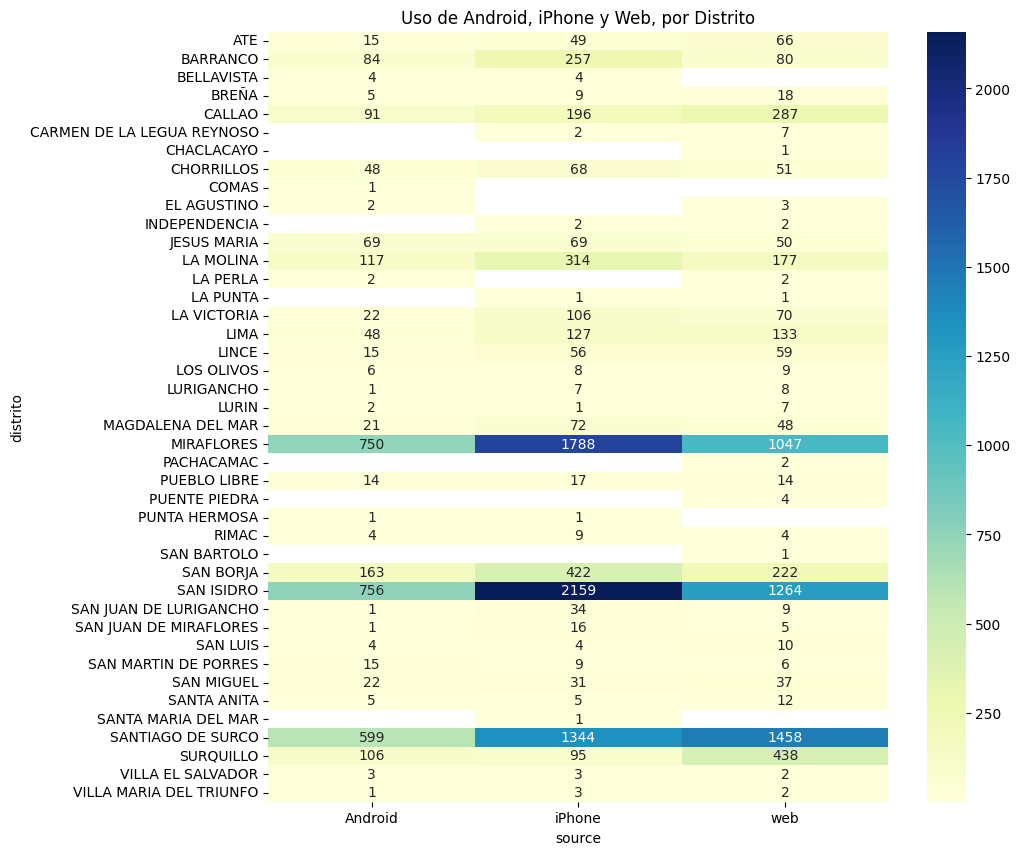

In [ ]:
# Hay patronoes diferenciados sobre el uso de web, Android o Iphone por cada distrito?
# Podemos hace igual al anterior un mapa de calor para esto.

pivot_table2 = dg_filtro.pivot_table(index='distrito', columns='source', values='journey_id', aggfunc='count')
plt.figure(figsize=(10, 10))
sns.heatmap(pivot_table2[['Android', 'iPhone',	'web']], cmap='YlGnBu', annot=True, fmt='g')
plt.title('Uso de Android, iPhone y Web, por Distrito')
plt.show()

En el mapa de calor se observa que en la mayoría de los distritos usan más el iPhone, a excepción del Callao, Santiago de Surco y Surquillo donde hay una ligera preferencia por la web.

In [ ]:
dg_filtro.sample(3)

,journey_id,user_id,driver_id,taxi_id,icon,start_type,start_at,start_lat,start_lon,end_at,end_lat,end_lon,end_state,driver_start_lat,driver_start_lon,arrived_at,currency,price,price_distance,price_duration,distance,duration,cost,cost_distance,cost_duration,source,driver_score,rider_score,mes,year,date,hour,MonthDayNum,DayOfWeek,DayOfWeek_i,latitude,longitude,geometry,index_right,provincia,distrito,latitude_2,longitude_2,distancia_euclidiana
3560,a54a01f4e95231629c39af7a0291b405,81391eb34b4ff58d304e5aa357d4c7df,d665fb9f75ef5d9cd0fd89479380ba78,0accdd3aa5a322f4129fa20b53278c69,executive,asap,2010-03-28 18:51:00,"-12,11791992","-77,03457642",28/03/2010 20:07,"-12,12665176","-77,03552246",drop off,"-12,11592478","-77,02991891",28/03/2010 18:54,PEN,4444.0,1689.0,2755.0,5279.0,3306.0,3305.0,1267.0,2038.0,iPhone,5.0,5.0,3,2010,2010-03-28,18,28,Sunday,6,-12.117920,-77.034576,POINT (-77.03458 -12.11792),23,LIMA,MIRAFLORES,-12.126652,-77.035522,976.0
13028,576d6a494b4a0c632e3f088675ed2425,55a921582f7b88ef61a3d8e24f502205,ab581e277813d5d9ff98d03b1c96a13f,ab581e277813d5d9ff98d03b1c761722,executive,asap,2010-04-02 13:58:00,"-12,12142944","-76,99057007",02/04/2010 14:21,"-12,09770584","-77,02011108",drop off,"-12,12294105","-76,99305758",02/04/2010 14:03,PEN,1744.0,1669.0,75.0,5215.0,90.0,1700.0,1252.0,56.0,iPhone,4.0,4.0,4,2010,2010-04-02,13,2,Friday,4,-12.121429,-76.990570,POINT (-76.99057 -12.12143),7,LIMA,SANTIAGO DE SURCO,-12.097706,-77.020111,4156.0
19561,a491690b9632d59a3506247c6f427854,d69674eb058aac145b2404c45d3aebba,c814db2127582cf95dea1f74f43127c2,16cbe35db7fff70fbc8251b4cdca8eb8,executive,asap,2010-12-27 05:48:00,"-12,1226387","-76,98022461",27/12/2010 6:25,"-12,1138916","-77,04382324",drop off,"-12,12347938","-77,0240545",27/12/2010 6:03,PEN,2049.0,1797.0,252.0,5615.0,301.0,0.0,0.0,0.0,iPhone,5.0,5.0,12,2010,2010-12-27,5,27,Monday,0,-12.122639,-76.980225,POINT (-76.98022 -12.12264),7,LIMA,SANTIAGO DE SURCO,-12.113892,-77.043823,6982.0


Text(0.5, 1.0, 'Distritos con relación al precio')

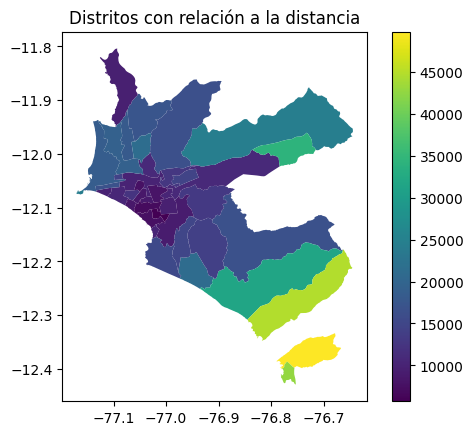

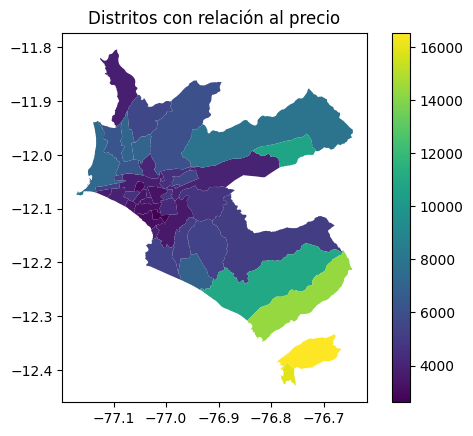

In [ ]:
# Los viajes en los distritos céntricos en la ciudad son generalmente más cortos o más largos.
# Hay alguna influencia en el precio?
lima_dis.merge(dis).plot(column='distance', legend=True)
plt.title("Distritos con relación a la distancia")
lima_dis.merge(dis).plot(column='price', legend=True)
plt.title("Distritos con relación al precio")


En el mapa anterior se observa una clara concentracion de viajes cortos en los distritos centricos que a la vez va relacionado a los preocios mas bajos.

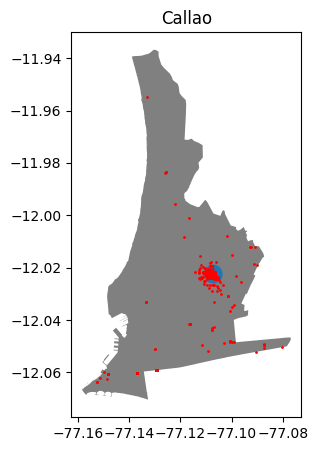

In [ ]:
# Se observa que hay muchos viajes que inician o terminan en el Aeropuerto.

# Tomamos una coordenada referencial del aeropuerto, le sacmos un buffer de 0.4 km y lo conbertimos aun gpd

from shapely.geometry import Point
aeropuerto = Point(-77.107095, -12.022484)
buffer_km = 0.4
buffer_gdf = gpd.GeoDataFrame(geometry=[aeropuerto.buffer(buffer_km / 111.32)], crs='EPSG:4326')

callao = lima_dis[lima_dis['distrito'] == 'CALLAO']
base = callao.plot(color='gray',figsize=(3, 5))
buffer_gdf.plot(ax=base)
dg_filtro[dg_filtro['distrito'] == 'CALLAO'].plot(ax=base, marker='o', color='red', markersize=1, legend=True)
plt.title("Callao")
plt.show()

In [ ]:
# filtramos todos los viajes que inician del aeropuerto:

viajes_aeropuerto = dg_filtro[dg_filtro.geometry.within(buffer_gdf.geometry.iloc[0])]


In [ ]:
# Eliminamos la columna geometry ya que ese representa el lugar de partida de los viajes.
del viajes_aeropuerto['geometry']

In [ ]:
# convertimos la coordenadas de llegada a gemetry
viajes_aeropuerto2 = gpd.GeoDataFrame(
    viajes_aeropuerto, geometry=gpd.points_from_xy(viajes_aeropuerto.longitude_2, viajes_aeropuerto.latitude_2), crs="EPSG:4326"
)
del viajes_aeropuerto2['index_right']

In [ ]:
# Agregando una columna de distrito de llegada
lima_dis['dis_llegada'] = lima_dis['distrito']

In [ ]:
viajes_aeropuerto3 = viajes_aeropuerto2.sjoin(lima_dis[['id','dis_llegada','geometry']])
viajes_aeropuerto3.sample(3)

,journey_id,user_id,driver_id,taxi_id,icon,start_type,start_at,start_lat,start_lon,end_at,end_lat,end_lon,end_state,driver_start_lat,driver_start_lon,arrived_at,currency,price,price_distance,price_duration,distance,duration,cost,cost_distance,cost_duration,source,driver_score,rider_score,mes,year,date,hour,MonthDayNum,DayOfWeek,DayOfWeek_i,latitude,longitude,provincia,distrito,latitude_2,longitude_2,distancia_euclidiana,geometry,index_right,id,dis_llegada
10000,949be0368739d589fed232ad88776cf3,86aa09456b63a2a25e0097c55203bbfb,b66c43e298753a3d39220e53008a1eb8,72727eaca32690cbede1b205ffa8d810,executive,reserved,2010-07-19 04:20:00,"-12,02127075","-77,10980225",19/07/2010 5:30,"-12,10631943","-76,98449707",drop off,"-12,04625906","-77,09843888",19/07/2010 4:21,PEN,6553.0,5293.0,1260.0,16540.0,1512.0,4587.0,3705.0,882.0,iPhone,NaN,5.0,7,2010,2010-07-19,4,19,Monday,0,-12.021271,-77.109802,CALLAO,CALLAO,-12.106319,-76.984497,16586.0,POINT (-76.98450 -12.10632),0,2,SAN BORJA
6840,2e51db3a8a77aa594aa686ff19de0bd2,15c2795f9994744f8ffef0a4ba095708,d665fb9f75ef5d9cd0fd89479380ba78,0accdd3aa5a322f4129fa20b53278c69,executive,reserved,2010-05-16 11:15:00,"-12,02442169","-77,10519409",16/05/2010 11:49,"-12,10139465","-77,01382446",drop off,"-12,00854964","-77,08660791",16/05/2010 11:10,PEN,5971.0,5757.0,214.0,17992.0,257.0,4476.0,4318.0,158.0,iPhone,3.0,5.0,5,2010,2010-05-16,11,16,Sunday,6,-12.024422,-77.105194,CALLAO,CALLAO,-12.101395,-77.013824,13114.0,POINT (-77.01382 -12.10139),49,50,SAN ISIDRO
786,23a1406fc6a11d866e3c82f22eec9d63,fdd0e7184d1ec5e7cba69b61ee4be622,d04f1a596fe4a582f48e6eb2f9e8f617,d04f1a596fe4a582f48e6eb2f9e8cceb,executive,reserved,2010-11-17 04:50:00,"-12,02450943","-77,1055603",17/11/2010 5:41,"-12,10400391","-76,96789551",drop off,"-12,02182171","-77,10813936",17/11/2010 4:20,PEN,8663.0,7055.0,1608.0,23559.0,1921.0,6484.0,5294.0,1190.0,iPhone,NaN,4.0,11,2010,2010-11-17,4,17,Wednesday,2,-12.024509,-77.105560,CALLAO,CALLAO,-12.104004,-76.967896,17385.0,POINT (-76.96790 -12.10400),7,32,SANTIAGO DE SURCO


In [ ]:
# Vemos cuales son los distritos con mayor llegada del aeropuerto
dis_lleg = viajes_aeropuerto3.groupby('dis_llegada').agg({'journey_id':'count'}).reset_index().sort_values('journey_id',ascending=False)
dis_lleg.rename(columns={'journey_id':'Cantidad_de_viajes'}, inplace=True)
dis_lleg.head(10)

,dis_llegada,Cantidad_de_viajes
8,MIRAFLORES,68
13,SAN ISIDRO,44
18,SANTIAGO DE SURCO,36
3,LA MOLINA,23
12,SAN BORJA,10
5,LIMA,9
17,SAN MIGUEL,7
7,MAGDALENA DEL MAR,6
0,CALLAO,5
1,CHORRILLOS,3


Text(0.5, 1.0, 'Distritos con mayor llegada del aeropuerto')

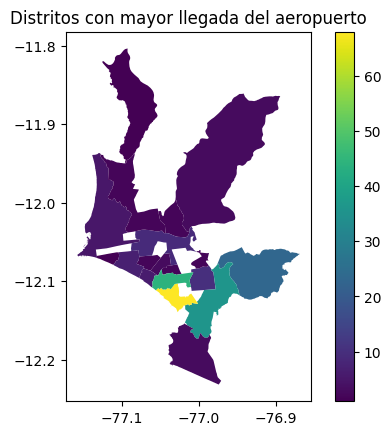

In [ ]:
lima_dis.merge(dis_lleg).plot(column='Cantidad_de_viajes', legend=True)
plt.title("Distritos con mayor llegada del aeropuerto")

Tanto en la tabla como en el mapa se observa que Mirafloes es al distrito donde mas llegan personas del aeropuerto.